In [3]:
import json
import ast

import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from tqdm.auto import tqdm
from scipy.stats import levene
import scipy.stats as st
import pylab
import statsmodels.stats.api as sms
import phik

import my_hypotheses as hyp
import LichessAnalys as li
import my_message as ms

c:\Program Files\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
lichessAnalys = li.LichessAnalys()
hypotheses = hyp.ProgressivePlayerCanBeACheater()
message_to_send = ms.MessageToSend()

In [5]:
df_for_test_group = pd.read_csv('./move_score_and_clocks.csv', sep=',')

In [6]:
df_for_test_group.head()

,date,game_id,time_control,clocks_list,move_count,user_id,move_score
0,2023-04-13,5qJUO8Wt,30+0,"[1.6, 23.2, 12.64, 19.44, 26.56, 14.72, 15.76,...",70,hipopotamus125,"[36, 24, -22, -24, -29, -21, -32, -18, -59, -6..."
1,2023-04-09,lG9EARkI,30+0,"[77.84, 2.48, 5.92, 10.08, 5.36, 2.64, 3.76, 4...",39,hipopotamus125,"[0, 29, 0, 0, 0, 17, 17, 0, -7, 0, -22, -17, -..."
2,2023-04-04,KSSbE0Je,30+0,"[3.6, 3.28, 3.04, 21.12, 6.88, 1.28, 1.44, 3.4...",44,hipopotamus125,"[0, 29, 39, 16, 35, 6, -59, -61, -59, -55, -29..."
3,2023-04-03,OS0Ztktl,30+0,"[2.88, 2.32, 2.0, 3.2, 2.48, 9.2, 8.88, 6.08, ...",30,hipopotamus125,"[36, 29, 34, 31, 29, 39, 36, 31, 40, 42, 30, 4..."
4,2023-03-30,it48y7zK,30+0,"[1.68, 1.52, 1.6, 1.12, 0.96, 0.56, 26.48, 29....",43,hipopotamus125,"[36, 30, 0, 30, 0, 0, 0, 0, 60, 95, 100, 121, ..."


In [7]:
df_for_test_group['clocks_list_new'] = \
    [ast.literal_eval(i) for i in df_for_test_group['clocks_list']]
df_for_test_group['move_score_new'] = \
    [ast.literal_eval(i) for i in df_for_test_group['move_score']]

In [8]:
test_group = df_for_test_group['clocks_list_new'].explode('clocks_list_new')

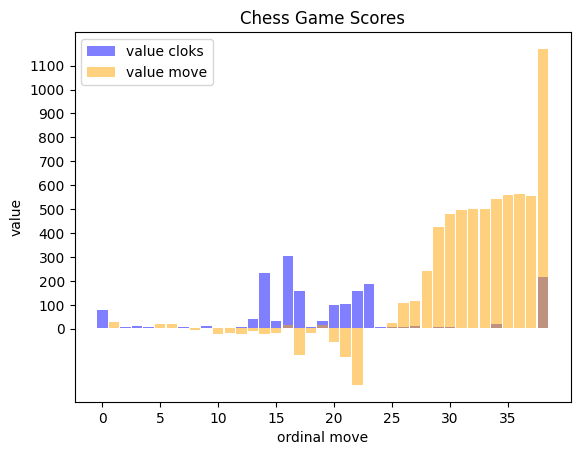

In [9]:
message_to_send.create_plot_eval_cloks(number_game=1)

In [10]:
number_game = 7
def create_plot_eval_cloks(self, number_game):
    len_move = len(df['move_score_new'][number_game])
    max_score = max(df['move_score_new'][number_game])
    plt.bar(range(len_move), df['clocks_list_new'][number_game],
        color='blue',
        width=0.9,
        bottom=1,
        alpha=0.5)

    plt.bar(range(len_move), df['move_score_new'][number_game],
        color='orange',
        width=0.9,
        bottom=1,
        alpha=0.5)
    plt.legend(['value cloks', 'value move'])
    plt.xticks(np.arange(0,len_move,5))
    plt.yticks(np.arange(0,max_score,100))
    plt.ylabel('value')
    plt.xlabel('ordinal move')
    plt.title('Chess Game Scores')
    plt.savefig('sample_plot.png')

In [11]:
df_for_control_group = pd.read_csv('./merge_eval_and_clocks_for_control_group.csv', sep=',')

In [12]:
df_for_control_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          211 non-null    object
 1   game_id       211 non-null    object
 2   time_control  211 non-null    object
 3   clocks_list   211 non-null    object
 4   move_count    211 non-null    int64 
 5   user_id       211 non-null    object
 6   move_score    211 non-null    object
dtypes: int64(1), object(6)
memory usage: 11.7+ KB


In [13]:
df_for_control_group.head()

,date,game_id,time_control,clocks_list,move_count,user_id,move_score
0,2023-04-07,1EFJ8rOF,20+10,"[1.92, 3.68, 0.72, 0.56, 0.88, 5.84, 0.64, 3.8...",28,tsilboy,"[0, 16, 5, 0, 0, 0, 0, 3, -1, 80, 70, 2, -29, ..."
1,2023-04-07,7T4uKdHI,20+10,"[4.4, 8.4, 8.72, 2.56, 1.36, 1.28, 1.68, 2.16,...",49,tsilboy,"[0, 5, -1, -52, 35, 44, 8, 20, -2, 12, -26, -2..."
2,2023-04-02,qBpEMUqo,30+0,"[2.32, 1.12, 2.0, 1.2, 4.32, 21.36, 325.92, 14...",86,tsilboy,"[36, 41, 0, 19, 11, 0, 168, 244, 211, 274, 88,..."
3,2023-03-19,ZA4TqEPn,30+0,"[2.0, 2.4, 3.92, 2.24, 2.56, 6.48, 4.32, 10.8,...",72,tsilboy,"[0, 29, 0, 20, 17, 22, 52, 39, 52, 54, 124, 11..."
4,2023-03-03,dUouTFlV,30+0,"[7.68, 1.84, 2.0, 1.76, 13.12, 2.32, 1.68, 2.0...",27,tsilboy,"[0, 0, 18, 39, 26, 59, 119, 107, 75, 34, 250, ..."


In [14]:
df_for_control_group['clocks_list_new'] = \
    [ast.literal_eval(i) for i in df_for_control_group['clocks_list']]

In [15]:
control_group = df_for_control_group['clocks_list_new'].explode('clocks_list_new')

In [16]:
all_count = round(control_group.count())
all_mean = control_group.mean()
all_std = control_group.std()
sample_mean_distribution = \
    pd.Series([np.random.normal(all_mean, all_std, size=all_count).mean() for i in range(1000)])

<Axes: >

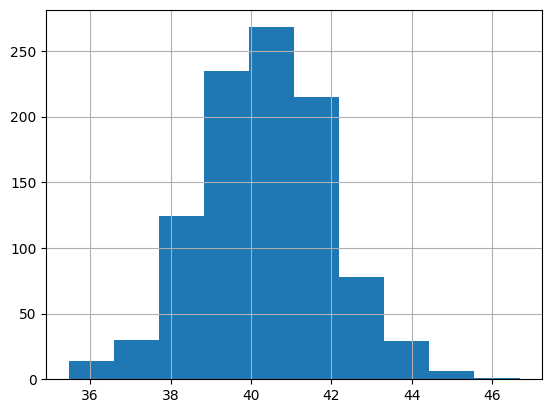

In [17]:
sample_mean_distribution.hist()

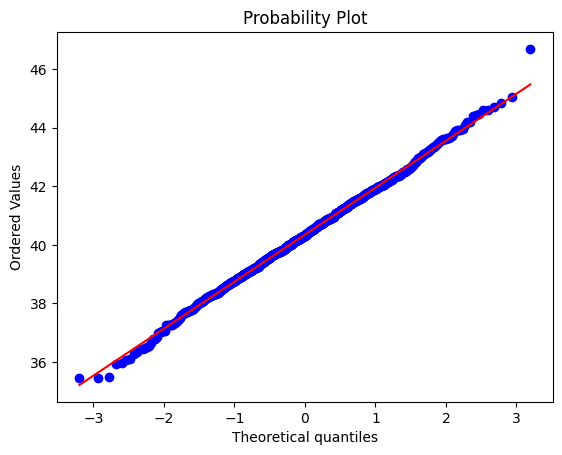

In [18]:
st.probplot(sample_mean_distribution, dist="norm", plot=pylab)
pylab.show()

In [19]:
stat, p = levene(control_group, test_group, center='median')
p

0.8332953292312156

In [20]:
baseline = control_group.mean()
mde = test_group.mean() - control_group.mean()
std_a = control_group.std()
std_b = test_group.std()
sample_size_a = len(control_group)
sample_size_b = len(test_group)
result = []
n = 10000
for _ in tqdm(range(n)):
  a = np.random.normal(baseline, std_a, size=sample_size_a)
  b = np.random.normal(baseline + mde, std_b, size=sample_size_b)
  _, pval = ttest_ind(a, b, equal_var=False)
  result.append(pval)

100%|██████████| 10000/10000 [00:09<00:00, 1045.10it/s]


In [21]:
t = pd.Series(result)
(t < 0.05).mean()

0.061

In [22]:
all_data = pd.concat([test_group, control_group], ignore_index=True)

In [23]:
mean_a = test_group.mean()
mean_b = control_group.mean()
es = (mean_b - mean_a)/ all_data.std()

In [24]:
sms.TTestIndPower().solve_power(es, power=0.80, alpha=0.05, ratio=9/1)

94654.77306351387

In [93]:
print(len(df_for_test_group['clocks_list_new'][26]))

54


In [105]:
df_for_test_group['clocks_list_new'][26][-1]

1489.82

In [94]:
print(len(df_for_test_group['move_score_new'][26]))

54


In [104]:
df_for_test_group['move_score_new'][26][-1]

-921

In [97]:
d = {'clocks_list': df_for_test_group['clocks_list_new'][26], 'move_score': df_for_test_group['move_score_new'][26]}
df = pd.DataFrame(data=d)

In [106]:
t = df[['clocks_list', 'move_score']]
print(t)

    clocks_list  move_score
0          0.56          21
1          1.12           0
2          1.44           9
3         25.84           0
4         11.12          35
5          2.80          39
6          5.12          29
7          2.24          23
8         13.68          37
9         14.88          46
10         5.60          71
11         2.08          12
12         6.56          58
13         4.16          28
14         2.00         154
15         4.00         148
16        20.72          30
17         9.28          16
18         1.60         -20
19         2.72         -14
20         4.48           0
21         8.08           8
22         2.96           0
23         4.56         -53
24         2.24           0
25        14.64         -71
26         2.72        -108
27         1.20         -93
28         1.12        -159
29         3.84        -214
30         1.92        -253
31         1.28        -299
32         2.16        -277
33         4.32        -288
34         8.56     

In [99]:
phik_overview = t.phik_matrix()

interval columns not set, guessing: ['clocks_list', 'move_score']


<Axes: >

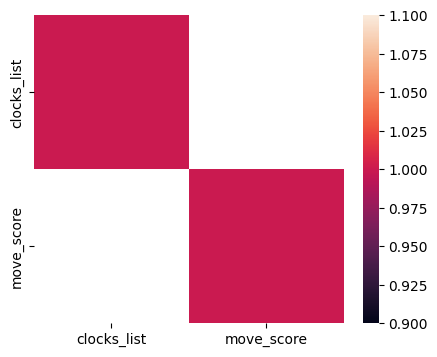

In [100]:
plt.figure(figsize = (5,4))
sns.heatmap(phik_overview)

In [112]:
correlation_coefficient = phik_overview['clocks_list'][0]
print(type(correlation_coefficient))

<class 'numpy.float64'>


In [79]:
df_for_test_group['clocks_list_new'][1][-1]

213.29

In [113]:
def add_correlation_coefficient(
    df_for_satatistical_test: pd.DataFrame) -> pd.Series:

    len_df = df_for_satatistical_test.shape[0]
    list_df_len = list(range(0,len_df,1))
    correlation_list = []

    for i in list_df_len:
        len_clocks = len(df_for_satatistical_test['clocks_list_new'][i])
        len_score = len(df_for_satatistical_test['move_score_new'][i])
        if len_clocks != len_score:
            if len_clocks < len_score:
                df_for_satatistical_test['clocks_list_new'][i] \
                    .append(df_for_satatistical_test['clocks_list_new'][i][-1])
            else:
                df_for_satatistical_test['move_score_new'][i] \
                    .append(df_for_satatistical_test['move_score_new'][i][-1])
        else:
            d = {
                'clocks_list': df_for_satatistical_test['clocks_list_new'][i],
                'move_score': df_for_satatistical_test['move_score_new'][i]}
            df = pd.DataFrame(data=d)
            t = df[['clocks_list', 'move_score']]
            phik_overview = t.phik_matrix()
            correlation_coefficient = phik_overview['clocks_list'][1]
            correlation_list.append(correlation_coefficient)
    result = pd.Series(correlation_list)
    return result

In [117]:
rd = add_correlation_coefficient(df_for_test_group)
df_for_test_group['correlation_coefficient'] = rd

interval columns not set, guessing: ['clocks_list', 'move_score']
interval columns not set, guessing: ['clocks_list', 'move_score']
interval columns not set, guessing: ['clocks_list', 'move_score']
interval columns not set, guessing: ['clocks_list', 'move_score']
interval columns not set, guessing: ['clocks_list', 'move_score']
interval columns not set, guessing: ['clocks_list', 'move_score']
interval columns not set, guessing: ['clocks_list', 'move_score']
interval columns not set, guessing: ['clocks_list', 'move_score']
interval columns not set, guessing: ['clocks_list', 'move_score']
interval columns not set, guessing: ['clocks_list', 'move_score']
interval columns not set, guessing: ['clocks_list', 'move_score']
interval columns not set, guessing: ['clocks_list', 'move_score']
interval columns not set, guessing: ['clocks_list', 'move_score']
interval columns not set, guessing: ['clocks_list', 'move_score']
interval columns not set, guessing: ['clocks_list', 'move_score']
interval c